In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")


In [ ]:

df= pd.read_csv(r"C:\Users\hp\Pictures\10 Academy\week1\news-sentiment-stock-analysis\Data\raw_analyst_ratings.csv")

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['headline'], inplace=True)

df[['headline', 'date', 'stock']].head()


,headline,date,stock
0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:59-04:00,A


In [6]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

df['polarity'] = df['headline'].apply(get_polarity)
df['subjectivity'] = df['headline'].apply(get_subjectivity)

df[['headline', 'polarity', 'subjectivity']].head()


,headline,polarity,subjectivity
0,Stocks That Hit 52-Week Highs On Friday,0.0,0.0
1,Stocks That Hit 52-Week Highs On Wednesday,0.0,0.0
2,71 Biggest Movers From Friday,0.0,0.0
3,46 Stocks Moving In Friday's Mid-Day Session,0.0,0.0
4,B of A Securities Maintains Neutral on Agilent...,0.0,0.0


In [7]:
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(classify_sentiment)

# Count sentiment types
df['sentiment'].value_counts()


sentiment
Neutral     971720
Positive    320182
Negative    115426
Name: count, dtype: int64

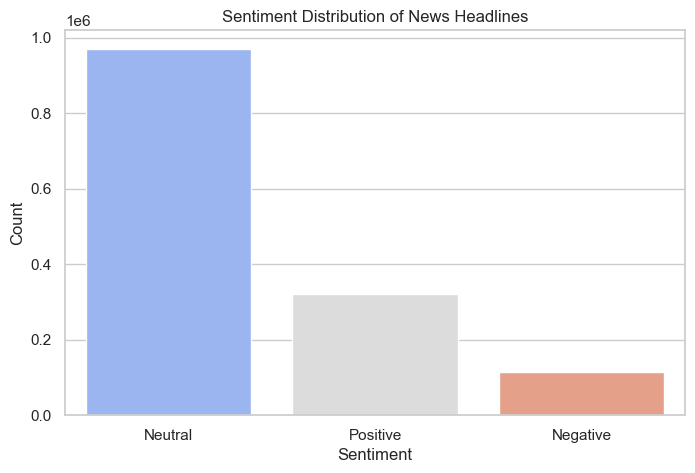

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title("Sentiment Distribution of News Headlines")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


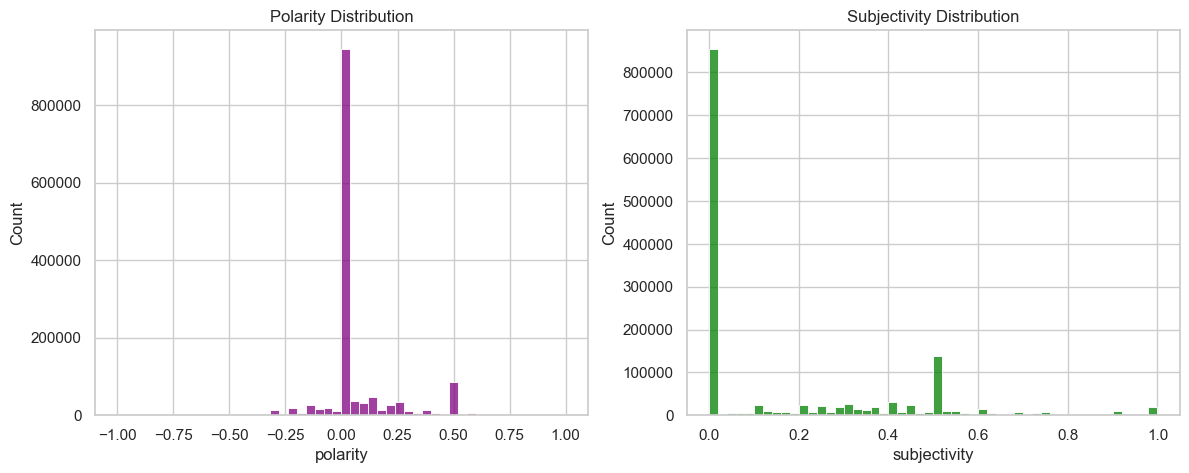

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['polarity'], bins=50, ax=ax[0], color='purple')
ax[0].set_title("Polarity Distribution")

sns.histplot(df['subjectivity'], bins=50, ax=ax[1], color='green')
ax[1].set_title("Subjectivity Distribution")

plt.show()


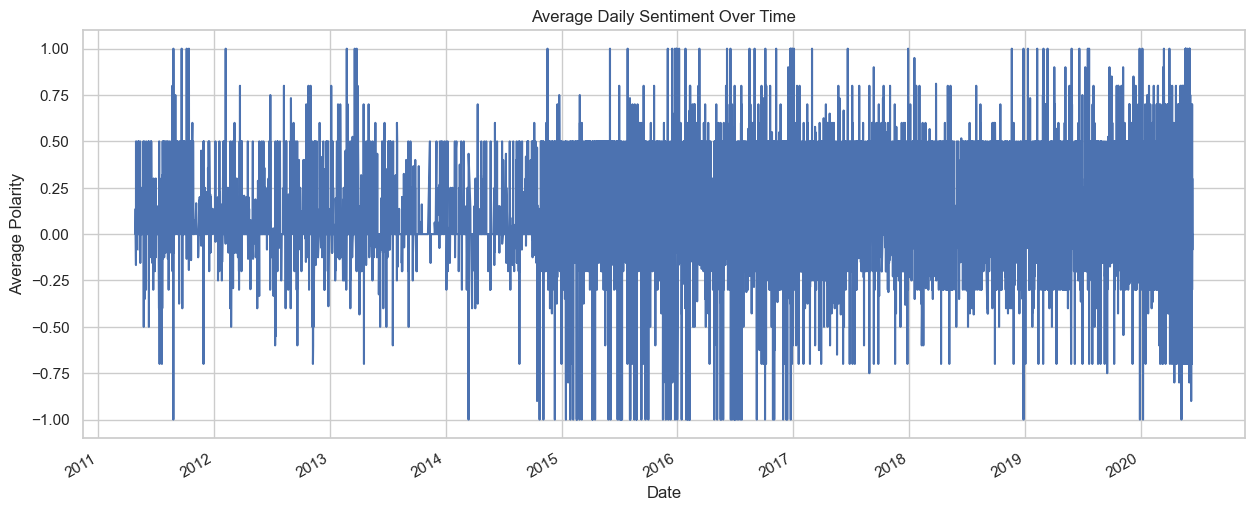

In [10]:
# Drop null dates if any
df = df.dropna(subset=['date'])

# Group by date and average polarity
daily_sentiment = df.groupby('date')['polarity'].mean()

plt.figure(figsize=(15,6))
daily_sentiment.plot()
plt.title("Average Daily Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Polarity")
plt.grid(True)
plt.show()


In [12]:
sentiment_summary = df.groupby(['date', 'stock'])['polarity'].mean().reset_index()
sentiment_summary.to_csv(r"C:\Users\hp\Pictures\10 Academy\week1\news-sentiment-stock-analysis\Data/sentiment_by_stock_date.csv", index=False)
sentiment_summary.head()


,date,stock,polarity
0,2011-04-27 21:01:48-04:00,DGP,0.000000
1,2011-04-28 13:49:29-04:00,ESR,0.136364
2,2011-04-28 15:00:36-04:00,DEJ,0.000000
3,2011-04-29 13:47:06-04:00,AIA,-0.166667
4,2011-04-29 16:11:05-04:00,GDL,0.500000
